# Final Project: Telco Custumer Churn Predicting Model
## Ellis Brown, Anandhu Mahesh and Carla Gonzalez
### Our goal for this assignment is to be able to predict if a customer is in high risk of churn. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("Telco-Customer-Churn.csv")

### As a first step is is always important to get familiarize with the dataset, we can do this by looking at its head, total lenght, value counts etc:

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(len(df))

7043


In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [7]:
df["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [11]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Text(0, 0.5, 'Number of Observations')

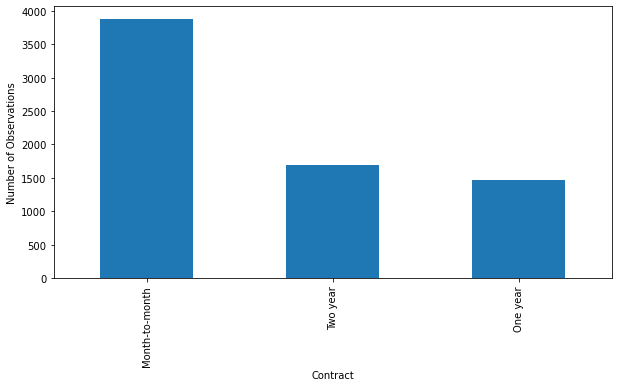

In [8]:
type_counts = df["Contract"].value_counts()
plt.rcParams["figure.figsize"] = (10,5)
type_counts.plot.bar()
plt.xlabel("Contract")
plt.ylabel("Number of Observations")


Text(0, 0.5, 'Number of Observations')

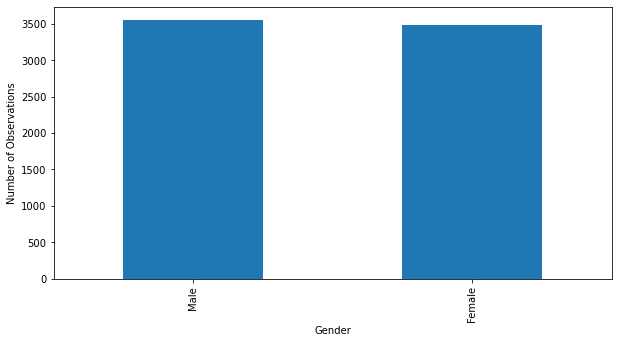

In [10]:
type_counts = df["gender"].value_counts()
plt.rcParams["figure.figsize"] = (10,5)
type_counts.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Number of Observations")

Text(0, 0.5, 'Number of Observations')

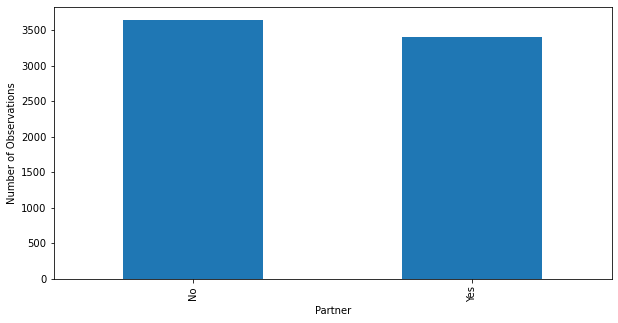

In [9]:
type_counts = df["Partner"].value_counts()
plt.rcParams["figure.figsize"] = (10,5)
type_counts.plot.bar()
plt.xlabel("Partner")
plt.ylabel("Number of Observations")

In [77]:
df[df["Churn"]!= "No"]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.8,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [78]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### After getting to know the data we noticied people with month to month contracts are more likely to churn rather than one year, also there is a pattern in gender and partner status. With this two discoveries we decided the two hypothesis we want to test are:  1) There is a relationship between customers churning and the type of contract they have. 2) Customers are more likely to churn if they are not partnered and are female.


In [79]:
df['is_female'] = df['gender'].apply(lambda g: int(g == 'Female'))
df['has_partner'] = df['Partner'].apply(lambda p: int(p == 'Yes'))
df['is_month_to_month'] = df['Contract'].apply(lambda g: int(g == 'Month-to-month'))
df['is_one_year'] = df['Contract'].apply(lambda g: int(g == 'One year'))
df['is_two_year'] = df['Contract'].apply(lambda g: int(g == 'Two year'))

In [80]:
from sklearn.metrics import accuracy_score

def train_logistic_regression(X, y):
    
    #Get number of examples
    N_EXAMPLES = len(y)
    TEST_SIZE = round(0.25 * N_EXAMPLES)
    
    # Split the data into training/testing sets
    X_train = X[:-TEST_SIZE]
    X_test = X[-TEST_SIZE:]

    # Split the targets into training/testing sets
    y_train = y[:-TEST_SIZE]
    y_test = y[-TEST_SIZE:]

    # Create linear regression object
    regr = linear_model.LogisticRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    
    return regr

In [81]:
X = df[['is_female', 'has_partner', 'is_month_to_month', 'is_one_year', 'is_two_year']]
y = df['Churn']

In [82]:
r = train_logistic_regression(X, y)
r.coef_

0.7234525837592277


array([[ 0.05023097, -0.18145626,  1.6554457 , -0.041919  , -1.61334468]])

### With the use of Logistic Regression we can conclude 1) people with month-to-month contract have e^(1.6554457) times the odd of churn rather than one year contrtact customers who are e^(-.041919) less likely to churn, and two year contract customers who are e^(-1.61333368) less likely to churn. As we can see, it is much probable customers stay as customers if they contract their services for two years. And 2) Females have e^(0.50023097) times the odd of churn rather than men, in the case of partner status,  people with partners are e^(-.18145626) less likely to churn rather than single customers.